In [17]:
#we are going to import the geracao dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os

In [18]:
dataset = pd.read_csv('geracao.csv')
del dataset["Unnamed: 0"]
#print(dataset.head)

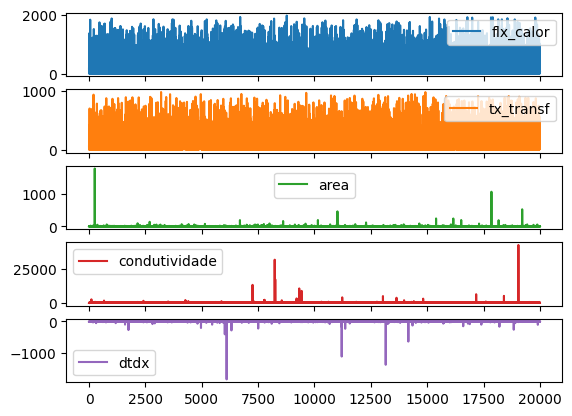

In [19]:
#we are going to plot every single data in the dataset to see how it looks like
dataset.plot(subplots=True)
plt.show()
#saving the plot as a image

Na célula abaixo estamos limpando os dados, excluimos dados que tinham a condutividade térmica acima de 500, área acima de 30 e dt/dx maior que -50

In [20]:
#vamos podar o dataset removendo instancias em que o dt/dx é muito grande, maior que -50
before = dataset.shape[0]

dataset = dataset[dataset.iloc[:,4] > -30]
dataset = dataset[dataset.iloc[:,3] < 300]
dataset = dataset[dataset.iloc[:,2] < 30]
#quantidades de rows que temos no dataset
after = dataset.shape[0]
print("antes: ", before)
print("depois: ", after)
print("perda: ", (before - after))


antes:  20000
depois:  19754
perda:  246


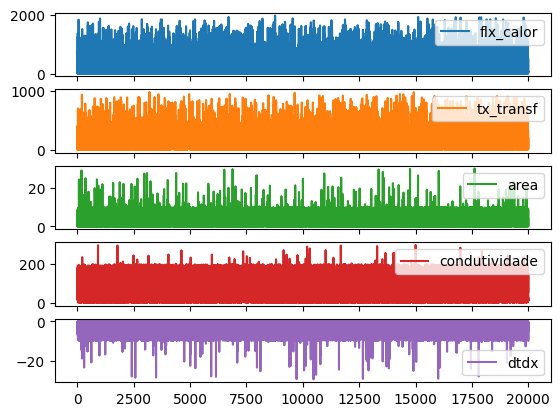

In [21]:
dataset.plot(subplots=True)
plt.show()


In [22]:
dados = dataset[["tx_transf", "area","condutividade","dtdx"]]
target = dataset["flx_calor"]

In [23]:
X_train_full, x_test, y_train_full, y_test = train_test_split(dados, target, test_size=0.25, random_state=42)


In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
x_test = scaler.transform(x_test)


In [26]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3,activation="relu", input_shape=[4]):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation=activation, **options))
        options = {}
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [27]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\Saint\AppData\Local\Temp\ipykernel_14052\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [28]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [29]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(10, 256),
    "learning_rate": reciprocal(3e-5, 3e-3),
    "activation": ["tanh"],
}

In [30]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=5,n_jobs=1,cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=10,monitor="val_loss")],verbose=2)

c:\Users\Saint\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
232/232 - 2s - loss: 45427.7031 - val_loss: 10281.2949 - 2s/epoch - 7ms/step
Epoch 2/50
232/232 - 1s - loss: 7140.0884 - val_loss: 3190.2500 - 1s/epoch - 5ms/step
Epoch 3/50
232/232 - 1s - loss: 2907.1233 - val_loss: 1558.9969 - 1s/epoch - 6ms/step
Epoch 4/50
232/232 - 1s - loss: 1630.9094 - val_loss: 926.0008 - 1s/epoch - 6ms/step
Epoch 5/50
232/232 - 1s - loss: 1066.8591 - val_loss: 646.1707 - 1s/epoch - 5ms/step
Epoch 6/50
232/232 - 1s - loss: 781.5518 - val_loss: 486.8065 - 1s/epoch - 5ms/step
Epoch 7/50
232/232 - 1s - loss: 602.7177 - val_loss: 396.6208 - 1s/epoch - 5ms/step
Epoch 8/50
232/232 - 1s - loss: 479.4243 - val_loss: 298.3152 - 1s/epoch - 5ms/step
Epoch 9/50
232/232 - 1s - loss: 395.3000 - val_loss: 274.3219 - 1s/epoch - 6ms/step
Epoch 10/50
232/232 - 1s - loss: 332.4978 - val_loss: 209.4656 - 1s/epoch - 6ms/step
Epoch 11/50
232/232 - 2s - loss: 282.6094 - val_loss: 240.6505 - 2s/epoch - 7ms/step
Epoch 12/50
232/232 - 2s - loss: 243.1164 - val_loss: 180.1475 -

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000025A8A782590>,
                   n_iter=5, n_jobs=1,
                   param_distributions={'activation': ['tanh'],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025A8A81FA00>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,...
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255])})

In [31]:
model = rnd_search_cv.best_estimator_.model

In [32]:
hist = model.history.history

In [33]:
rnd_search_cv.best_params_

{'activation': 'tanh',
 'learning_rate': 0.00024102543812478013,
 'n_hidden': 1,
 'n_neurons': 230}

In [34]:
rnd_search_cv.best_score_

-50.14701716105143

In [35]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 230)               1150      
                                                                 
 dense_54 (Dense)            (None, 1)                 231       
                                                                 
Total params: 1,381
Trainable params: 1,381
Non-trainable params: 0
_________________________________________________________________


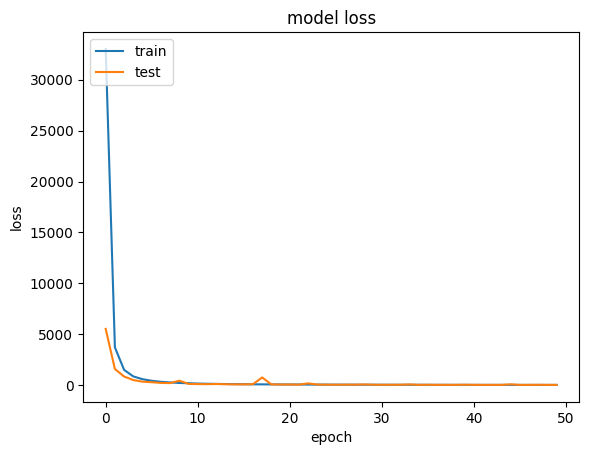

In [36]:
#ploting the loss and the validation loss
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()


In [37]:
#average of the loss and the val loss
#weighted average
loss = hist["loss"]
val_loss = hist["val_loss"]
average_loss = np.average(loss)
average_val_loss = np.average(val_loss)
print("average loss: ", average_loss)
print("average val loss: ", average_val_loss)


average loss:  865.6622953414917
average val loss:  261.07822605133055


In [38]:
mse_test = model.evaluate(x_test, y_test)

155/155 [==============================] - 1s 3ms/step - loss: 76.2195


In [39]:
#ploting the predictions and the actual values
y_pred = model.predict(x_test)
y_pred = y_pred.flatten()
#ploting the predictions and the actual values

155/155 [==============================] - 0s 2ms/step


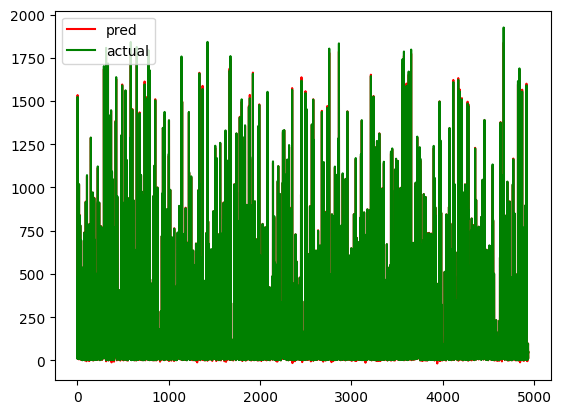

In [40]:

plt.plot(y_pred, color="red", label="pred")
plt.plot(y_test.values, color="green", label="actual")
plt.legend(loc="upper left")
plt.show()

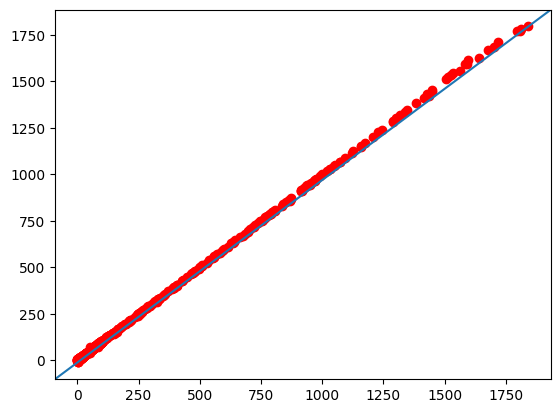

In [41]:
#making a scatter graph of the real values and a line of the predictions
plt.scatter(y_test.values[:1000], y_pred[:1000], color="red")
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes)
plt.show()


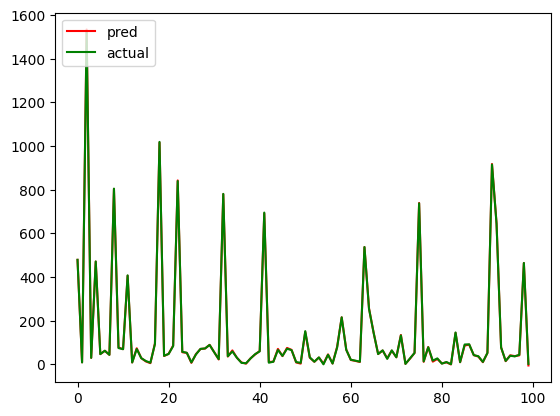

In [42]:
#plotting just the first 100 predictions and values
plt.plot(y_pred[:100], color="red", label="pred")
plt.plot(y_test.values[:100], color="green", label="actual")
plt.legend(loc="upper left")
plt.show()


In [43]:
#predicting the first 10 values
for i in range(10):
    print("pred: ", y_pred[i], "actual: ", y_test.values[i])


pred:  478.89804 actual:  478.9428705694216
pred:  9.561941 actual:  8.804275583121186
pred:  1534.2252 actual:  1523.6483976593097
pred:  29.925882 actual:  29.90211447351348
pred:  471.01282 actual:  471.51861482726576
pred:  47.004257 actual:  47.14058320069307
pred:  62.164726 actual:  62.59189208321325
pred:  43.726448 actual:  43.697246427767
pred:  803.8638 actual:  805.1080501048084
pred:  77.154755 actual:  74.84710728084754


In [44]:
#importing the dataset test.csv
dataset_test = pd.read_csv('teste.csv')
#setting up the target and the data
target = dataset_test["flx_calor"]
dados = dataset_test[["tx_transf", "area","condutividade","dtdx"]]
#scaling the data
dados = scaler.transform(dados)

In [45]:
new_mse_test = model.evaluate(dados, target)

313/313 [==============================] - 1s 3ms/step - loss: 2569.9419


In [46]:
#getting the path of every single file that eds with .h5 in the folder
path = os.getcwd()
files = os.listdir(path)
files = [f for f in files if f.endswith(".h5")]

#a partir da linha de cima, teremos uma lista com todos os modelos já salvos na psta

In [47]:
print(files)

['model_1_211.h5']


In [48]:
#com a linha abaixo iremos obter duas listas, cada uma delas contendo as evaluations de cada modelo previamente salvo,
#para que podemos plotar o gráfico de loss e val_loss geral mais tarde.
mse_list_test = []
mse_list_new_test = []
for i in files:
    model = keras.models.load_model(i)
    mse_new = model.evaluate(dados, target)
    mse_list_new_test.append(mse_new)
    mse_old = model.evaluate(x_test, y_test)
    mse_list_test.append(mse_old)

155/155 [==============================] - 0s 3ms/step - loss: 73.6709


In [49]:
#average of the evaluations of older models on the test set
average_mse_test = np.average(mse_list_test)
#average o the new evaluations on the test set
average_mse_new_test = np.average(mse_list_new_test)

In [50]:
print("average mse test: ", average_mse_test)
print("average mse new test: ", average_mse_new_test)
print("mse test: ", mse_test)
print("mse new test: ", new_mse_test)

average mse test:  73.67090606689453
average mse new test:  3237.889892578125
mse test:  76.21952819824219
mse new test:  2569.94189453125


In [51]:
#before saving the model, we are going to verify if its evaluation on the test and in the new dataset are smaller
#than the average of the evaluations of the older models

if (new_mse_test < average_mse_new_test and mse_test < average_mse_test) or (new_mse_test < average_mse_new_test and mse_test > average_mse_test):
    #creating a name of the model, based on the date and the amount of hidden layers and neurons
    #name = "model_" + str(datetime.datetime.now()) + "_" + str(rnd_search_cv.best_params_["n_hidden"]) + "_" + str(rnd_search_cv.best_params_["n_neurons"]) + ".h5"
    #name is going to be tha name of the model, which consists in the amount of hidden layers and neurons
    name = "model_" + str(rnd_search_cv.best_params_["n_hidden"]) + "_" + str(rnd_search_cv.best_params_["n_neurons"]) + ".h5"
    model.save(name)
    print("model saved")

model saved


In [52]:
#showing the first 10 predctions and the real values
y_pred = model.predict(dados)
y_pred = y_pred.flatten()
for i in range(10):
    print("pred: ", y_pred[i], "actual: ", target.values[i])

313/313 [==============================] - 1s 2ms/step
pred:  8.78948 actual:  11.852630820644512
pred:  -1.5411835 actual:  0.3016214819000103
pred:  -2.0483608 actual:  1.1641686731543934
pred:  40.388313 actual:  38.09338785454672
pred:  14.705471 actual:  7.504780220833624
pred:  42.496918 actual:  41.39914254430953
pred:  284.39868 actual:  283.6450252389896
pred:  0.47918892 actual:  3.956658909157888
pred:  -0.12256622 actual:  3.0062474349195
pred:  4.5289354 actual:  3.369284162303632


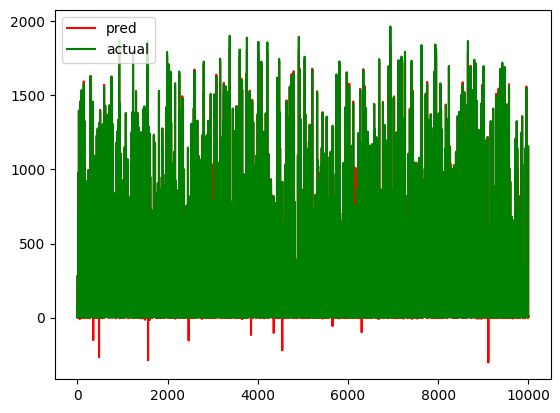

In [53]:
#Plotting the predictions and the real values
plt.plot(y_pred, color="red", label="pred")
plt.plot(target.values, color="green", label="actual")
plt.legend(loc="upper left")
plt.show()



In [60]:
#getting all the files that end with .h5
path = os.getcwd()
files = os.listdir(path)
files = [f for f in files if f.endswith(".h5")]


In [61]:
print(files)

['model_1_211.h5', 'model_1_230.h5']


In [65]:
def arrays_evas(mse_list_test,mse_list_new_test,files):
    for i in files:
        #Printing the filename
        print(i)
        model = keras.models.load_model(i)
        print(model.summary())
        mse_new = model.evaluate(dados, target)
        mse_list_new_test.append(mse_new)
        mse_old = model.evaluate(x_test, y_test)
        mse_list_test.append(mse_old)

In [66]:
mse_list_new_test = []
mse_list_test = []
arrays_evas(mse_list_test,mse_list_new_test,files)

model_1_211.h5
155/155 [==============================] - 0s 3ms/step - loss: 73.6709
model_1_230.h5
155/155 [==============================] - 1s 3ms/step - loss: 73.6709


In [64]:
print(mse_list_test)

[73.67090606689453, 73.67090606689453]


In [ ]:
#ploting the graph of the evaluations of the older models on the test set